In [1]:
"""
The general method for the ARIMA implementation comes from:

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
"""

'\nThe general method for the ARIMA implementation comes from:\n\nhttps://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7\nhttps://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/\n'

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from sklearn import metrics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pmdarima import auto_arima

#Imported to ignore warnings from ARIMA
import warnings
warnings.filterwarnings("ignore")

#10 import statements

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#3 lines written by me

In [4]:
def read_data(pathname, indicatorcode):
    df = pd.read_excel(pathname)
    
    df2 = df.loc[df['Indicator Code'] == indicatorcode]
    
    #Dropping these columns as they are not needed for the forecast
    df2 = df2.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
    
    df3 = df2.swapaxes('index', 'columns')
    
    return df3

#6 lines written by me

In [5]:
"""
Method for this block of code is refactored from:

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
"""

def stationarityTest(data):
    
    #Find out if the data is stationary or not
    #Using Rolling Statistics (Rolling Mean and Rolling Std)
    rolling_mean = data.rolling(window=10).mean()
    rolling_std = data.rolling(window=10).std()
    
    plt.plot(data, color='blue', label='original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('RM vs RSTD vs ORI')
    
    #Augmented Dickey-Fuller Test
    result = adfuller(data.dropna())
    print('ADF Statistic: {}'.format(result[0]))
    #print(f'p-value: {result[1]}')
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
        
#14 lines from guide

In [6]:
"""
Order Differencing refactored from:

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
"""

def make_stationary(data):
    
#1st Order Differencing
    data_first_od = data.diff()
    data_first_od_dropped = data_first_od.dropna(inplace=True)
    
    return data_first_od

In [7]:
def performance_metrics(y_test, y_pred):
    
    sign1 = np.sign(np.array(y_test[1:]) - np.array(y_test[:-1]))
    sign2 = np.sign(np.array(y_pred[1:]) - np.array(y_pred[:-1]))
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test )) *100
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mda = np.mean((sign1 == sign2).astype(int))
    mean = np.mean(y_test)
    si = (rmse/mean)*100
    
    print("RMSE: ", rmse)
    print("MAPE: ", mape)
    print("MAE: ", mae)
    print("Scatter Index: ", si)
    print("MDA: ", mda)
    print("Mean of actual: ", mean)
    
#16 lines, 9 lines written by me, 4 documentation 3 modi

In [8]:
data = read_data('/Users/farhanhabibie/Desktop/Farhan Thesis Code /UG-Project-Farhan/Indonesia Macro Dataset.xlsx', 
                     'FR.INR.RINR')
#1 line written by me

In [9]:
data = data.dropna()
#1 line written by me

In [10]:
print(data.mean())
#1 line written by me

262    6.25903
dtype: float64


In [11]:
data_first_od = make_stationary(data)
#1 line written by me

ADF Statistic: -5.858947199917669
p-value: 0.000000
Critical Values:
	1%: -3.6461350877925254
	5%: -2.954126991123355
	10%: -2.6159676124885216


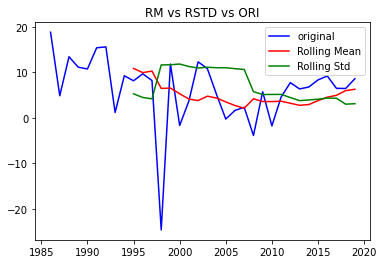

In [12]:
stationarityTest(data)
#1 line written by me

ADF Statistic: -6.948203045314894
p-value: 0.000000
Critical Values:
	1%: -3.661428725118324
	5%: -2.960525341210433
	10%: -2.6193188033298647


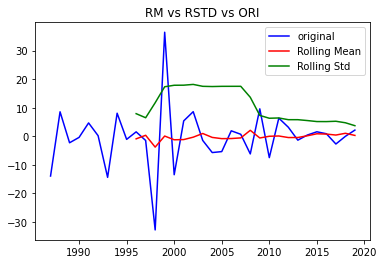

In [13]:
stationarityTest(data_first_od)
#1 line written by me

In [14]:
#Find AR order(p), differencing order(d), MA(q)

#Find AR order(p) using a PACF, only considering the 
#plot_pacf(data_first_od.dropna(), lags=13)

#Find MA order (q) using acf plot
#plot_acf(data_first_od.dropna())

#2 lines from documentation

In [15]:
train = data[:int(len(data)*0.8)]
test = data[int(len(data)*0.8):]

In [16]:
"""
reused and modified from: 

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
"""

model = ARIMA(train, order=(0,0,0))
model = model.fit()
predict = model.predict(start=len(train), end=len(train)+len(test)-1)
#3 lines from guide but modified

<AxesSubplot:title={'center':'Real Interest Rate Actual vs Predicted'}>

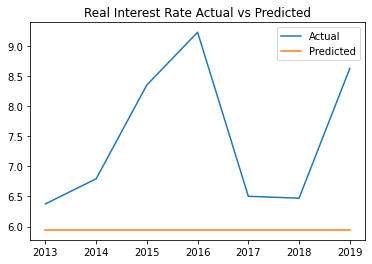

In [21]:
df_compare = pd.DataFrame({'Actual' : test.values.flatten(), 'Predicted' : predict.values})
newindex = test.index.values.tolist()
df_compare.index = newindex
df_compare.plot(title='Real Interest Rate Actual vs Predicted')
#4 lines written by me

In [18]:
performance_metrics(test.values, predict.values)
#1 line written by me

RMSE:  1.8985724474258399
MAPE:  18.778921458159164
MAE:  1.5331490187121115
Scatter Index:  25.393773226899157
MDA:  0.0
Mean of actual:  7.476527534768708


In [19]:
"""
Idea for using pmdarima attributed to the video on youtube:

https://www.youtube.com/watch?v=8FCDpFhd1zk&ab_channel=NachiketaHebbar
"""

autoarima = auto_arima(data, start_p=0, start_q=0, 
                       max_p=10, max_d=5, max_q=10,
                       trace=True, d=0, suppress_warnings=True, n_fits=50)

autoarima.summary()

#2 lines from youtube

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=236.587, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=238.585, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=238.586, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=252.935, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=240.014, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.064 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   34
Model:                        SARIMAX   Log Likelihood                -116.293
Date:                Tue, 26 Apr 2022   AIC                            236.587
Time:                        23:48:22   BIC                            239.639
Sample:                             0   HQIC                           237.628
                                 - 34                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.2590      1.722      3.636      0.000       2.885       9.633
sigma2        54.7570      8.707      6.289      0.000      37.692      71.822
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                83.18
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -1.98
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
"""
83 Lines of code
"""

'\n83 Lines of code\n'